Инициализация.
---

Добавляем к путям поиска путь к сборкам CadEditor

In [9]:
import sys
cadEditorDir = "d:/DEV/MYGIT/CadEditor/"
sys.path.append(cadEditorDir)

Загружаем Python.NET, и добавляем ссылки на используемые сборки

In [10]:
import clr
clr.AddReference("CadEditor")
clr.AddReference("PluginVideoNes")
pass

Импортируем необходимые классы из сборок

In [11]:
from CadEditor import Globals, ConfigScript
from PluginVideoNes import Video

Загружаем ROM и конфиг

In [12]:
romName    = cadEditorDir + "Darkwing Duck (U) [!].nes"
configName = cadEditorDir + "settings_darkwing_duck/Settings_DarkwingDuck-All.cs"

Globals.loadData(romName, "", configName)

После успешной загрузки важные данные находятся в:<br>
<b>Globals.romdata</b> – массив байт загруженного ROM.<br>
<b>ConfigScript</b> – все функции загрузки данных из ROM и сохранения их обратно.

Отображение данных из готового конфига
---

Попробуем загрузить массив байт и отобразить его в виде банка видеопамяти NES

In [5]:
print "Смещение CHR-банков в ROM:", ConfigScript.videoOffset
print "Смещение палитр в ROM:", ConfigScript.palOffset

Смещение CHR-банков в ROM: Start address:0x30010. Records count:16, Record Size:4096
Смещение палитр в ROM: Start address:0x1C36D. Records count:32, Record Size:16


In [6]:
#Создаём экземляр плагина для отрисовки NES-графики
video = Video()

#функция для отображения CHR-банка ROM в виде картинки
video.makeImageRectangle?
#public Bitmap makeImageRectangle(
#    byte[] videoChunk, //загруженный банк памяти
#    byte[] pallete,    //палитра
#    int subPalIndex,   //индекс в палитре от 0 до 3, с помощью которого будет отображен банк памяти
#    float scale,       //масштабирование выходной картинки 
#    bool scaleAccurate = true, //масштабировать ли пиксели точно (в противном случае при масштабировании используется сглаживание)
#    bool withAlpha = false)    //будет ли выходные картинка содержать прозрачные пиксели (в противном случае прозрачный цвет будет залит чёрным)


In [7]:
#считываем первый банк видеопамяти и первую палитру из ROM
videoChunk = ConfigScript.getVideoChunk(0x80) #индексы видео начинаются не с 0, а с 0x90. Не спрашивайте почему...
print "Размер загруженного блока видео:", len(videoChunk), "байт"
pallete    = ConfigScript.getPal(0)
print "Размер загруженной палитры:", len(pallete), "байт"
videoBitmap = video.makeImageRectangle(videoChunk, pallete, 0, 2.0, True, False)
print "Размер выходного изображения: %dx%d пикселей"%(videoBitmap.Width, videoBitmap.Height)

Размер загруженного блока видео: 4096 байт
Размер загруженной палитры: 16 байт
Размер выходного изображения: 256x256 пикселей


Отображение CHR-банков
---

Сохранение и отображение полученных картинок

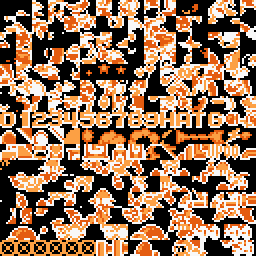

In [8]:
from IPython.display import display, Image
picPath = "D:/CadEditorPythonExamples/"
#сохраняем картинку в файл:
videoBitmap.Save(picPath+"chr0.png")

#отображаем её:
Image(filename=picPath+"chr0.png")

Отображение банка памяти во всех вариантах бит индекса субпалитры

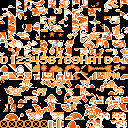

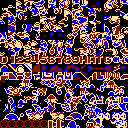

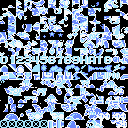

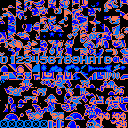

In [9]:
for subPalIndex in xrange(4):
    i = video.makeImageRectangle(videoChunk, pallete, subPalIndex, 1.0, True, False)
    fname = picPath+"chr%d.png"%subPalIndex
    i.Save(fname)
    display(Image(fname))

Построение всех блоков уровня 
---
(для игр Capcom, Tiny Toon Adventures, Three Eyes Story)

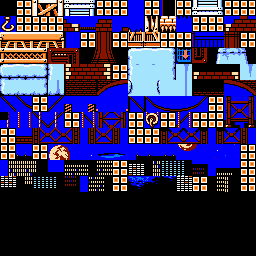

In [10]:
from CadEditor import MapViewType
#Bitmap makeObjectsRectangle(
#    byte videoPageId, //номер используемого банка видеопамяти
#    byte tilesId,     //номер набора индексов блоков
#    byte palId,       //номер используемой палитры
#    float scale,      //масштабирование
#    MapViewType drawType,  //режим отображения - сами тайлы, их типы, либо индексы (полезно для различения одинаковых внешне тайлов)
#    int constantSubpal = -1); //рисовать ли все блоки одним и тем же индексом субпалитры
b = video.makeObjectsRectangle(0x90, 0, 0, 1.0, MapViewType.Tiles, -1)

fn = picPath+"objects0.png"
b.Save(fn)
Image(filename=fn)

Отображение макроблоков
---

Загрузка списка макроблоков

In [12]:
#Image[] makeBigBlocks(int videoNo, int bigBlockNo, int blockNo, int palleteNo, MapViewType smallObjectsViewType = MapViewType.Tiles,
#            float smallBlockScaleFactor = 2.0f, float curButtonScale = 2, MapViewType curViewType = MapViewType.Tiles, bool showAxis = false)

imgs = video.makeBigBlocks(0x90, 0, 0, 0, MapViewType.Tiles, 2.0, 2.0, MapViewType.Tiles, False)

Отображение первых 16 макроблоков:

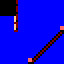

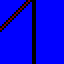

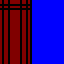

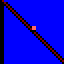

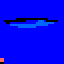

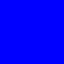

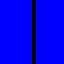

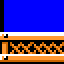

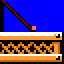

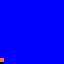

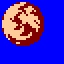

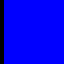

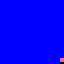

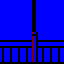

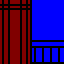

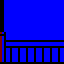

In [13]:
for x in xrange(16):
    fn = picPath+"mblock%d.png"%x
    imgs[x].Save(fn)
    display(Image(fn))

Отображение экранов
---

Отображение первых 4х экранов с помощью построенных макроблоков

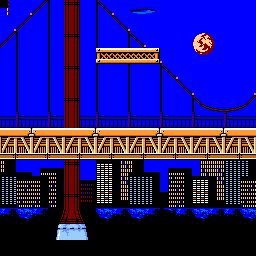

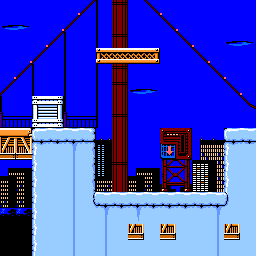

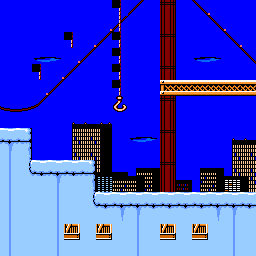

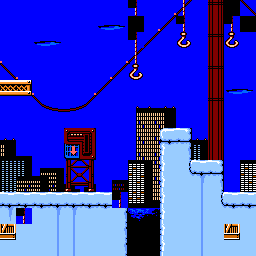

In [14]:
#//make capcom screen image
#Bitmap makeScreen(int scrNo, int levelNo, int videoNo, int bigBlockNo, int blockNo, int palleteNo, float scale = 2.0f, bool withBorders = true)

for i in xrange(4):
    scr = video.makeScreen(i, 0, 0x90, 0, 0, 0, 1.0, False)
    fn = picPath+"screen%03d.png"%i
    scr.Save(fn)
    display(Image(fn))